In [49]:
import torch
import numpy as np
from torch import nn # nn contains all of pytorch's building blocks
import matplotlib.pyplot as plt

torch.__version__

'2.0.1+cu118'

### Data Preparing and loading

In [50]:
# Craeating Linear Regression formula

w = 0.7
b = 0.3
X = torch.arange(0,1,0.02).unsqueeze(dim=1)
y = w*X + b

print(X.shape, y.shape)

X[:10], y[:10]

torch.Size([50, 1]) torch.Size([50, 1])


(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

### Splitting data into training and testing

In [51]:
len(X)
len(y)

train_split = int(0.8* len(X))
X_train, y_train  = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

X_train.shape, y_train.shape, X_test.shape, y_test.shape

(torch.Size([40, 1]),
 torch.Size([40, 1]),
 torch.Size([10, 1]),
 torch.Size([10, 1]))

### Building a function to visualize the data

In [52]:
def plot_predictions(train_data=X_train, train_labels = y_train,
                     test_data = X_test, test_labels = y_test, predictions = None):

  plt.figure(figsize=[10,7])

  plt.scatter(train_data, train_labels, c='b', s=4, label = 'Training data')
  plt.scatter(test_data, test_labels, c='g', s=4, label = 'Testing data')

  if predictions is not None:
    plt.scatter(test_data, predictions, c='r', s=4, label = 'Predictions')
  plt.legend(prop={'size':14})

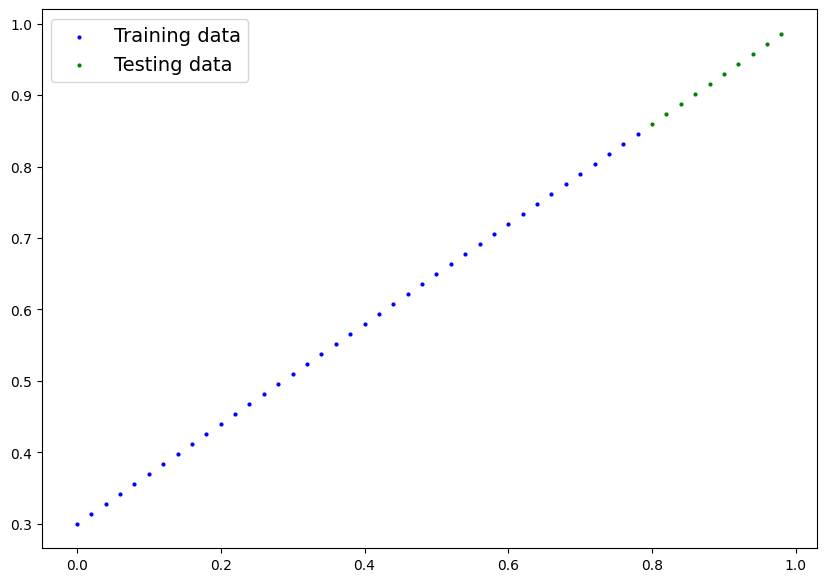

In [53]:
plot_predictions()

### Creating the first pytorch model for Linear regression

In [54]:
class LinearRegression(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, requires_grad=True,
                                            dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1, requires_grad=True,
                                         dtype=torch.float))
  def forward(self, x: torch.Tensor) -> torch.Tensor:
     return self.weights * x + self.bias


### Checking the contents of pytorch model

In [55]:
random_seed = 42
torch.manual_seed(random_seed)

# Create an instance of model

model0 = LinearRegression()
list(model0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [56]:
model0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Making predictions using torch.inference_mode()

In [57]:
# Make predictions with model

with torch.inference_mode():
  y_pred = model0(X_test)
y_pred

# with torch.no_grad(): -> similar to inference mode
#   y_preds = model0(X_test)
# y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [58]:
X_test

tensor([[0.8000],
        [0.8200],
        [0.8400],
        [0.8600],
        [0.8800],
        [0.9000],
        [0.9200],
        [0.9400],
        [0.9600],
        [0.9800]])

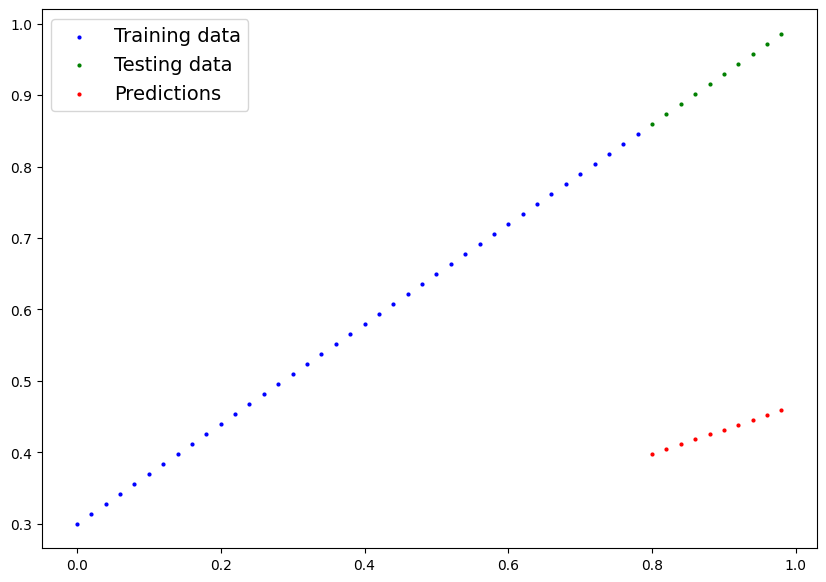

In [59]:
plot_predictions(predictions=y_pred)

### Training a model with pytorch

In [60]:
# Setup a loss function

loss_fn = nn.L1Loss()


# Setup an optimizer

optimizer = torch.optim.SGD(params = model0.parameters(),
                            lr=0.01)

In [61]:
print(f"Actual: {model0.state_dict()}")

Actual: OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])


In [62]:
# Build a training loop in pytorch
torch.manual_seed(random_seed)
epochs = 200

# Tracking different values
epochs_count = []
loss_values = []
test_loss_values = []

for epoch in range(epochs):
  model0.train() # -> Training model
  train_pred = model0(X_train) # -> Forward Propogation
  loss = loss_fn(train_pred, y_train) # -> Calculate Loss Function
  optimizer.zero_grad()
  loss.backward() # -> Backward Propogation
  optimizer.step() # -> Perfom Gradient Descent

  model0.eval() # -> Testing Model
  with torch.inference_mode(): # -> Turns off gradient tracking
    test_pred = model0(X_test) # -> Forward Propogation
    test_loss = loss_fn(test_pred, y_test) # -> Calculate the Loss

    if epoch % 10 == 0:
      epochs_count.append(epoch)
      loss_values.append(loss)
      test_loss_values.append(test_loss)
      print(f"Epoch: {epoch} | Test: {loss} | Test-Loss: {test_loss}")
      print(model0.state_dict(),'\n')


Epoch: 0 | Test: 0.31288138031959534 | Test-Loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))]) 

Epoch: 10 | Test: 0.1976713240146637 | Test-Loss: 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))]) 

Epoch: 20 | Test: 0.08908725529909134 | Test-Loss: 0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))]) 

Epoch: 30 | Test: 0.053148526698350906 | Test-Loss: 0.14464017748832703
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))]) 

Epoch: 40 | Test: 0.04543796554207802 | Test-Loss: 0.11360953003168106
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))]) 

Epoch: 50 | Test: 0.04167863354086876 | Test-Loss: 0.09919948130846024
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))]) 

Epoch: 60 | Test: 0.03818932920694351 | Test-Loss: 0.08886633068323135
OrderedDict([('weights', tensor([0.5116])), ('bias', te

In [63]:
loss_values_new = torch.tensor(loss_values).numpy()
test_loss_values_new = torch.tensor(test_loss_values).numpy()

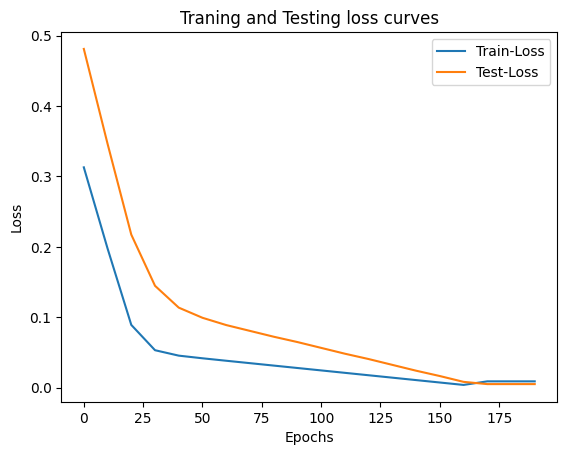

In [64]:
# plot the loss curves

plt.plot(epochs_count, loss_values_new, label= 'Train-Loss')
plt.plot(epochs_count, test_loss_values_new, label= 'Test-Loss')
plt.title('Traning and Testing loss curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

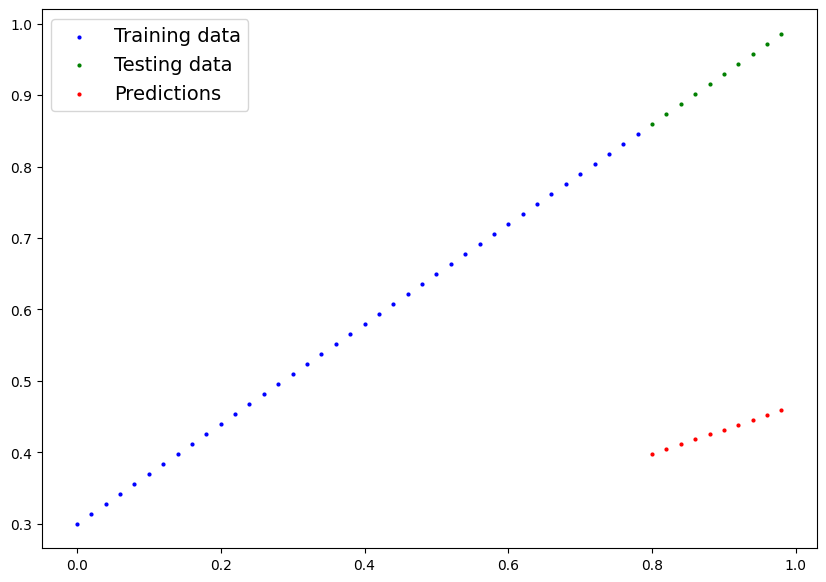

In [65]:
plot_predictions(predictions = y_pred)

In [66]:
with torch.inference_mode():
  y_preds_new = model0(X_test)


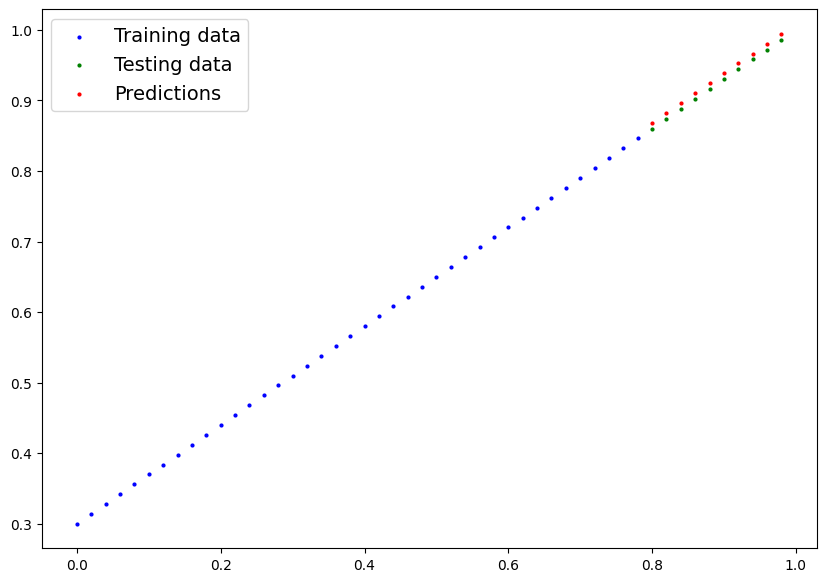

In [67]:
plot_predictions(predictions= y_preds_new)

### Saving/Loading a Model in Pytorch

Three main methods
1. **torch.save()** -> allows to save pytorch object in pickle format
2. **torch.load()** -> allows to load pytorch object
3. **torch.nn.Module.load_state_dict()** -> allows to load model's saved state dictionary

In [68]:
# Saving our pytorh model
from pathlib import Path

# 1. create model directory

MODEL_DIRECTORY = Path('models')
MODEL_DIRECTORY. mkdir(parents=True, exist_ok=True)

# 2. create model save path
MODEL_NAME = 'LinearRegression_0.pth'
MODEL_SAVE_PATH = MODEL_DIRECTORY/MODEL_NAME
MODEL_SAVE_PATH

# 3. save the model state.dict()
print(f'Saving model to: {MODEL_SAVE_PATH}')
torch.save(obj=model0.state_dict(), f=MODEL_SAVE_PATH)

Saving model to: models/LinearRegression_0.pth


In [69]:
# Loading the model state dict()

model_state = LinearRegression()
model_state.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [70]:
!ls -l models

total 8
-rw-r--r-- 1 root root 1107 Sep 15 04:51 LinearRegression_0.pth
-rw-r--r-- 1 root root 1691 Sep 15 04:36 LinearRegressionFull.pth


In [71]:
# Saving the entire model

ENTIRE_MODEL_NAME = 'LinearRegressionFull.pth'
NEW_MODEL_SAVE_PATH = MODEL_DIRECTORY/ENTIRE_MODEL_NAME
print(f'Saving the entire model to: {NEW_MODEL_SAVE_PATH}')
torch.save(obj=model0, f=NEW_MODEL_SAVE_PATH)

Saving the entire model to: models/LinearRegressionFull.pth


In [72]:
# Loading the entire model

model = torch.load(f=NEW_MODEL_SAVE_PATH)

In [73]:
!ls -l models

total 8
-rw-r--r-- 1 root root 1107 Sep 15 04:51 LinearRegression_0.pth
-rw-r--r-- 1 root root 1691 Sep 15 04:51 LinearRegressionFull.pth


In [74]:
model.state_dict(), model_state.state_dict()

(OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))]),
 OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))]))

In [75]:
# Make some predictions

model_state.eval()
with torch.inference_mode():
  loaded_model_preds = model_state(X_test)

loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [76]:
# Compare the loaded and original model predictions

model0.eval()
with torch.inference_mode():
  preds = model0(X_test)

preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [77]:
loaded_model_preds == preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

### Putting together all the above steps for more understanding

In [78]:
# Device agnostic code

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('Using device:' ,device)

Using device: cuda


In [79]:
X = torch.arange(0,1,0.02).unsqueeze(dim=1)
w = 0.8
b = 0.2
y = w*X + b
X.shape, y.shape

(torch.Size([50, 1]), torch.Size([50, 1]))

In [80]:
len(X), len(y)

train_split_data = int(0.8 * len(X))
X_train, y_train = X[:train_split_data], y[:train_split_data]
X_test, y_test = X[train_split_data:], y[train_split_data:]

X_train.shape, y_train.shape, X_test.shape, y_test.shape

(torch.Size([40, 1]),
 torch.Size([40, 1]),
 torch.Size([10, 1]),
 torch.Size([10, 1]))

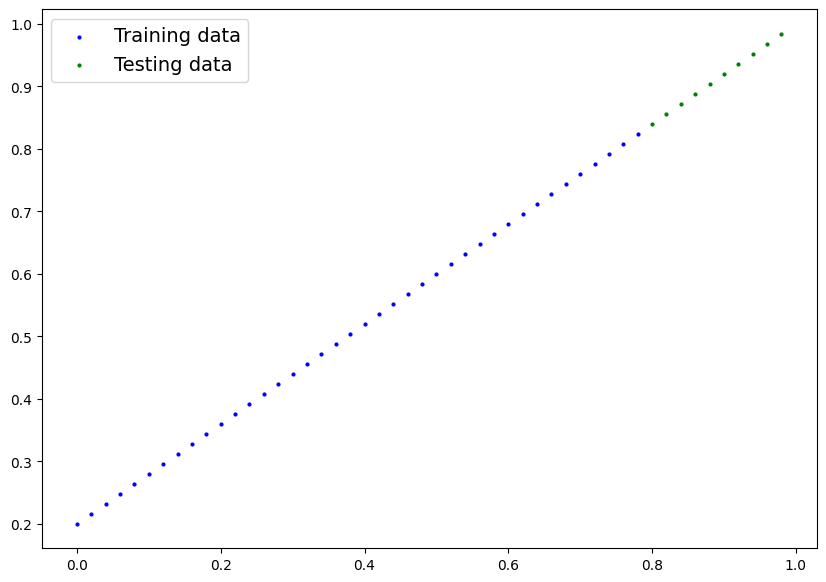

In [81]:
# Plot the data

plot_predictions(X_train, y_train, X_test, y_test)

In [82]:
# Building a Linear Model

class LinearRegressionV2(nn.Module):
  def __init__(self):
    super().__init__()

    self.linear_layer = nn.Linear(in_features=1, out_features=1)

  def forward(self, x: torch.Tensor)-> torch.Tensor:
    return self.linear_layer(x)


In [83]:
torch.manual_seed(42)

model1 = LinearRegressionV2()
model1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

In [84]:
with torch.inference_mode():
  orig_preds = model1(X_test)

orig_preds

tensor([[1.4416],
        [1.4569],
        [1.4722],
        [1.4875],
        [1.5028],
        [1.5181],
        [1.5334],
        [1.5487],
        [1.5640],
        [1.5793]])

In [85]:
next(model1.parameters()).device

device(type='cpu')

In [86]:
model1.to(device)
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)
next(model1.parameters()).device

device(type='cuda', index=0)

In [87]:
loss_func = nn.L1Loss()
optimizer = torch.optim.Adam(params = model1.parameters(),
                             lr=0.01)

In [88]:
# Train the model
torch.manual_seed(42)

epochs = 200
train_loss_val = []
test_loss_val = []
epoch_counter = []
for epoch in range(epochs):
  model1.train()
  train_preds = model1(X_train)
  train_loss = loss_func(train_preds, y_train)
  optimizer.zero_grad()
  train_loss.backward()
  optimizer.step()


  model1.eval()
  with torch.inference_mode():
    test_preds = model1(X_test)
    test_loss = loss_func(test_preds, y_test)

    if epoch % 10 == 0:
      epoch_counter.append(epoch)
      test_loss_val.append(test_loss)
      train_loss_val.append(train_loss)

      print(f'Epoch: {epoch} | Train-Loss: {train_loss} | Test-Loss: {test_loss}')
      print(model1.state_dict(),'\n')


Epoch: 0 | Train-Loss: 0.6161779165267944 | Test-Loss: 0.5795472264289856
OrderedDict([('linear_layer.weight', tensor([[0.7545]], device='cuda:0')), ('linear_layer.bias', tensor([0.8200], device='cuda:0'))]) 

Epoch: 10 | Train-Loss: 0.47717806696891785 | Test-Loss: 0.39054742455482483
OrderedDict([('linear_layer.weight', tensor([[0.6545]], device='cuda:0')), ('linear_layer.bias', tensor([0.7200], device='cuda:0'))]) 

Epoch: 20 | Train-Loss: 0.33817821741104126 | Test-Loss: 0.20154757797718048
OrderedDict([('linear_layer.weight', tensor([[0.5545]], device='cuda:0')), ('linear_layer.bias', tensor([0.6200], device='cuda:0'))]) 

Epoch: 30 | Train-Loss: 0.1991783231496811 | Test-Loss: 0.019528478384017944
OrderedDict([('linear_layer.weight', tensor([[0.4545]], device='cuda:0')), ('linear_layer.bias', tensor([0.5200], device='cuda:0'))]) 

Epoch: 40 | Train-Loss: 0.09843303263187408 | Test-Loss: 0.16321590542793274
OrderedDict([('linear_layer.weight', tensor([[0.3640]], device='cuda:0')),

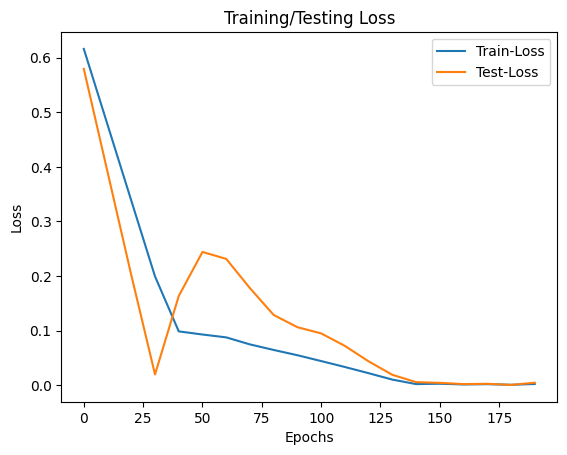

In [89]:
# plot the training data

new_train_vals = torch.tensor(train_loss_val).numpy()
new_test_vals = torch.tensor(test_loss_val).numpy()
new_epochs = torch.tensor(epoch_counter).numpy()

plt.title('Training/Testing Loss')
plt.plot(new_epochs, new_train_vals, label='Train-Loss')
plt.plot(new_epochs, new_test_vals, label='Test-Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [90]:
model1.eval()
with torch.inference_mode():
  new_preds = model1(X_test)
new_preds

tensor([[0.8413],
        [0.8572],
        [0.8732],
        [0.8891],
        [0.9051],
        [0.9210],
        [0.9370],
        [0.9529],
        [0.9689],
        [0.9848]], device='cuda:0')

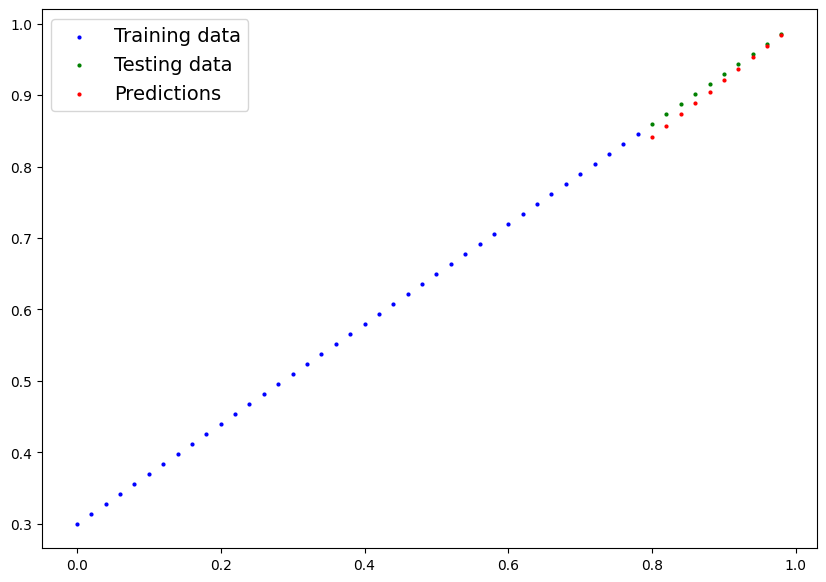

In [91]:
plot_predictions(predictions=new_preds.cpu())

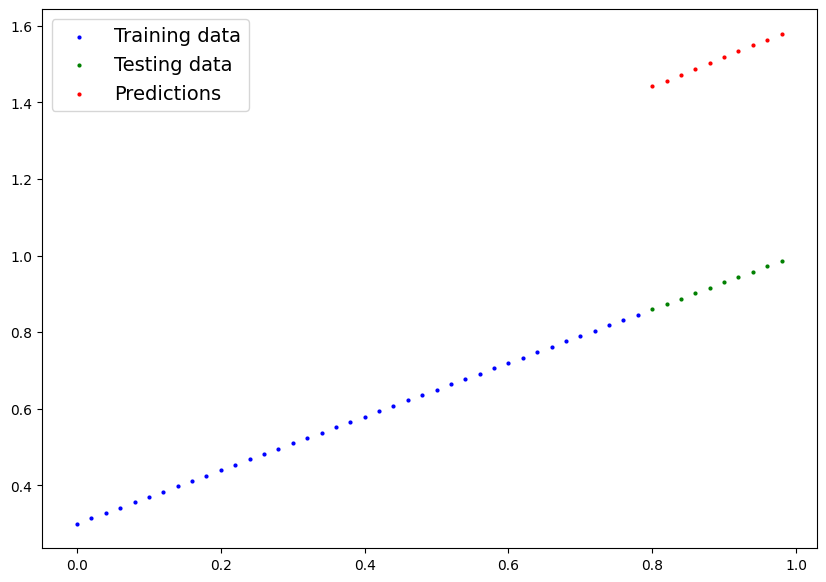

In [92]:
plot_predictions(predictions=orig_preds)

In [93]:
# Saving and loading the model

model_dir = Path('New_MODELS')
model_dir.mkdir(parents=True, exist_ok=True)

model_name = 'LinearRegression_1.pth'
save_path = model_dir/model_name
print(f"Saving model to: {save_path}")

torch.save(model1.state_dict(), save_path)

Saving model to: New_MODELS/LinearRegression_1.pth


In [94]:
loaded_model = LinearRegressionV2()
loaded_model.load_state_dict(torch.load(save_path))

loaded_model.to(device)
next(loaded_model.parameters()).device

device(type='cuda', index=0)

In [95]:
# make some predictions

loaded_model.eval()
with torch.inference_mode():
  loaded_preds = loaded_model(X_test)

loaded_preds


tensor([[0.8413],
        [0.8572],
        [0.8732],
        [0.8891],
        [0.9051],
        [0.9210],
        [0.9370],
        [0.9529],
        [0.9689],
        [0.9848]], device='cuda:0')

In [96]:
loaded_preds == new_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')

### EXERCISES --- Practice

In [182]:
# Exercise 1

sys_device  = 'cuda' if torch.cuda.is_available() else 'cpu'

X = torch.arange(0,3,0.02).unsqueeze(dim=1)
X
w = 0.3
b = 0.9
y = w*X + b

X.shape, y.shape

(torch.Size([150, 1]), torch.Size([150, 1]))

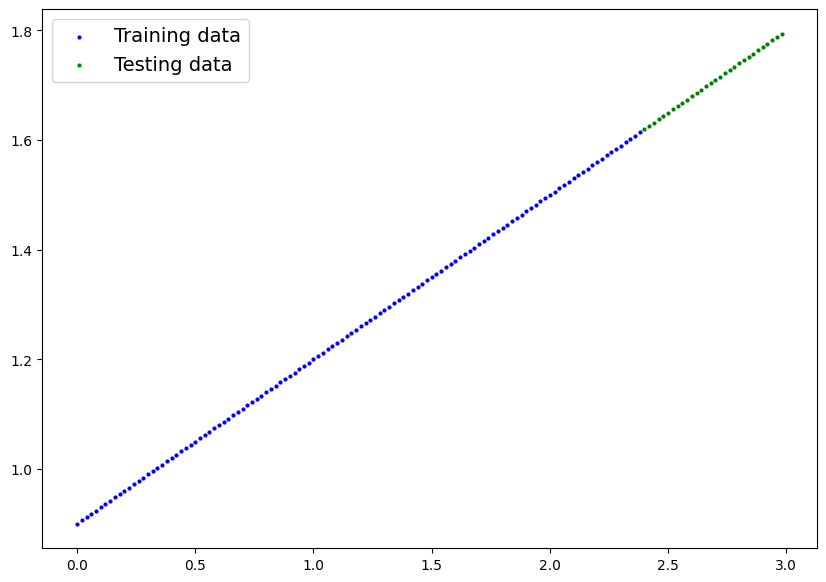

In [183]:
len(X), len(y)

split_data_ex = int(0.8 * len(X))
X_train, y_train = X[:split_data_ex], y[:split_data_ex]
X_test, y_test = X[split_data_ex:], y[split_data_ex:]

plot_predictions(X_train,y_train,X_test,y_test)

In [184]:
# Exercise 2

class LinearRegressionV_prac(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, requires_grad=True))
    self.bias = nn.Parameter(torch.randn(1, requires_grad=True))


  def forward(self, i: torch.Tensor) -> torch.Tensor:
    return self.weights*i + self.bias

prac_model = LinearRegressionV_prac()
prac_model.state_dict()


OrderedDict([('weights', tensor([-0.4220])), ('bias', tensor([-1.3323]))])

In [185]:
# Exercise 3

loss_prac = nn.L1Loss()
optim_prac = torch.optim.SGD(params = prac_model.parameters(),
                             lr = 0.01)

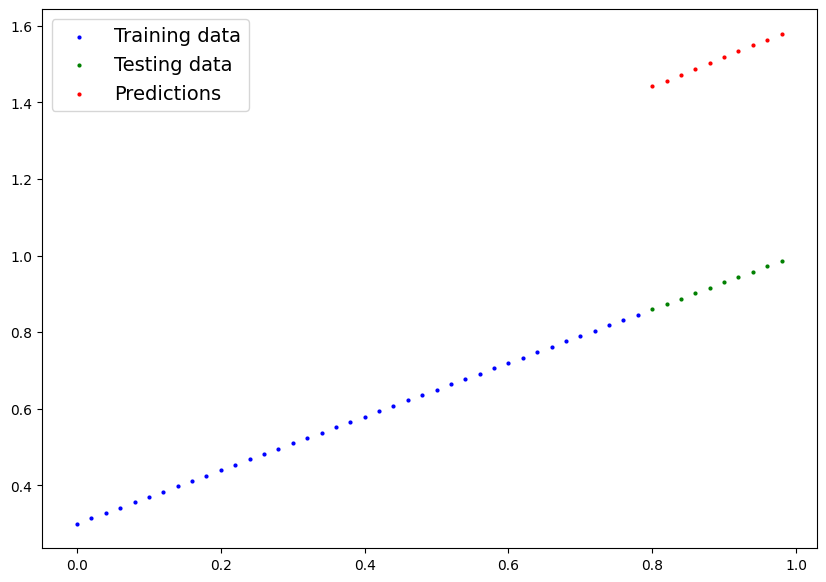

In [186]:
prac_model.eval()
with torch.inference_mode():
  original_preds = prac_model(X_test)

plot_predictions(predictions=orig_preds)

In [187]:
epochs = 300


for epoch in range(epochs):
  # training
  ep = []
  tr_vals = []
  tst_vals = []
  prac_model.train()
  train_pred = prac_model(X_train)
  train_loss = loss_prac(train_pred,y_train)
  optim_prac.zero_grad()
  train_loss.backward()
  optim_prac.step()

  # testing
  prac_model.eval()
  with torch.inference_mode():
    test_pred = prac_model(X_test)
    test_loss = loss_prac(test_pred, y_test)

  # printing
  if epoch % 30 ==0:
    ep.append(ep)
    tst_vals.append(test_loss)
    tr_vals.append(train_loss)
    print(f"Epoch:{epoch} | Train-Loss:{test_loss} | Test-Loss:{train_loss}")
    print(prac_model.state_dict(),'\n')


Epoch:0 | Train-Loss:4.132455825805664 | Test-Loss:3.091487407684326
OrderedDict([('weights', tensor([-0.4101])), ('bias', tensor([-1.3223]))]) 

Epoch:30 | Train-Loss:2.8721253871917725 | Test-Loss:2.3666574954986572
OrderedDict([('weights', tensor([-0.0531])), ('bias', tensor([-1.0223]))]) 

Epoch:60 | Train-Loss:1.611795425415039 | Test-Loss:1.6418278217315674
OrderedDict([('weights', tensor([0.3039])), ('bias', tensor([-0.7223]))]) 

Epoch:90 | Train-Loss:0.3514650762081146 | Test-Loss:0.9169977903366089
OrderedDict([('weights', tensor([0.6609])), ('bias', tensor([-0.4223]))]) 

Epoch:120 | Train-Loss:0.5353347659111023 | Test-Loss:0.4545302391052246
OrderedDict([('weights', tensor([0.8994])), ('bias', tensor([-0.1770]))]) 

Epoch:150 | Train-Loss:0.6457374095916748 | Test-Loss:0.4009852707386017
OrderedDict([('weights', tensor([0.8950])), ('bias', tensor([-0.0548]))]) 

Epoch:180 | Train-Loss:0.621464192867279 | Test-Loss:0.36242449283599854
OrderedDict([('weights', tensor([0.8498

In [189]:
# Exercise 4
prac_model.eval()
with torch.inference_mode():
  testing = prac_model(X_test)
testing
# plot_predictions(predictions=testing)

tensor([[1.8992],
        [1.9117],
        [1.9242],
        [1.9367],
        [1.9492],
        [1.9617],
        [1.9742],
        [1.9867],
        [1.9992],
        [2.0117],
        [2.0242],
        [2.0367],
        [2.0492],
        [2.0617],
        [2.0742],
        [2.0867],
        [2.0992],
        [2.1117],
        [2.1242],
        [2.1367],
        [2.1492],
        [2.1617],
        [2.1742],
        [2.1867],
        [2.1992],
        [2.2117],
        [2.2242],
        [2.2367],
        [2.2492],
        [2.2617]])

In [190]:
# Exercise 5

model_dir = Path('New_MODELS')
model_dir.mkdir(parents=True, exist_ok=True)

model_nm = 'Linear_Regressiona_Practice.pth'
save_mod_path = model_dir/model_nm
print(f'Saving model to:{save_mod_path}')
torch.save(prac_model.state_dict(), save_mod_path)

Saving model to:New_MODELS/Linear_Regressiona_Practice.pth


In [191]:
loaded_practice_model = LinearRegressionV_prac()
loaded_practice_model.load_state_dict(torch.load(save_mod_path))

<All keys matched successfully>

In [192]:
with torch.inference_mode():
  predict = loaded_practice_model(X_test)
predict

tensor([[1.8992],
        [1.9117],
        [1.9242],
        [1.9367],
        [1.9492],
        [1.9617],
        [1.9742],
        [1.9867],
        [1.9992],
        [2.0117],
        [2.0242],
        [2.0367],
        [2.0492],
        [2.0617],
        [2.0742],
        [2.0867],
        [2.0992],
        [2.1117],
        [2.1242],
        [2.1367],
        [2.1492],
        [2.1617],
        [2.1742],
        [2.1867],
        [2.1992],
        [2.2117],
        [2.2242],
        [2.2367],
        [2.2492],
        [2.2617]])

In [193]:
predict == testing

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])